In [49]:
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping  
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_train_4.txt to heart_train_4.txt


In [35]:
data = pd.read_csv('heart_train_4.txt', sep=" ", header=None)

In [36]:
data.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure","serum_cholesteral",
                "blood_sugar","electro_results","max_heart_rate","angina","oldpeak","slope_peak",
                "major_vessels","thal","disease"]

In [37]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesteral,blood_sugar,electro_results,max_heart_rate,angina,oldpeak,slope_peak,major_vessels,thal,disease
0,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,1
1,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2
2,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,2
3,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,1
4,67.0,0.0,3.0,152.0,277.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0,1


In [38]:
data["disease"]=data["disease"].replace(2,0)

on remplace les 2 par des 0 pour pouvoir utiliser la sigmoid

In [39]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesteral,blood_sugar,electro_results,max_heart_rate,angina,oldpeak,slope_peak,major_vessels,thal,disease
0,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,1
1,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,0
2,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,0
3,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,1
4,67.0,0.0,3.0,152.0,277.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0,1


on normalise les data

In [40]:
X=data.iloc[:,range(13)]
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
y=data.iloc[:,[13]]
trainX=X.values
trainy=y.values

In [41]:
trainX

array([[ 1.78543536, -1.41093612, -0.17643348, ..., -0.9672943 ,
         0.32805277, -0.85461145],
       [ 0.05943127, -1.41093612,  0.85355657, ...,  0.65236127,
        -0.7295502 , -0.85461145],
       [-1.34294705,  0.70546806,  0.85355657, ...,  0.65236127,
        -0.7295502 ,  0.69228302],
       ...,
       [ 1.03030857, -1.41093612,  0.85355657, ...,  0.65236127,
         1.38565575, -0.85461145],
       [-1.01932128, -1.41093612,  0.85355657, ...,  0.65236127,
        -0.7295502 , -0.85461145],
       [-0.58782026, -1.41093612,  0.85355657, ..., -0.9672943 ,
        -0.7295502 , -0.85461145]])

In [20]:
from google.colab import files
uploaded = files.upload()

Saving heart_test.txt to heart_test.txt


In [43]:
val = pd.read_csv('heart_test.txt', sep=" ", header=None)

In [44]:
val.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure","serum_cholesteral",
                "blood_sugar","electro_results","max_heart_rate","angina","oldpeak","slope_peak",
                "major_vessels","thal","disease"]
val["disease"]=val["disease"].replace(2,0)

on remplace les 2 par des 0 pour pouvoir utiliser la sigmoid

In [45]:
val.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesteral,blood_sugar,electro_results,max_heart_rate,angina,oldpeak,slope_peak,major_vessels,thal,disease
0,63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0,1
1,51.0,1.0,3.0,94.0,227.0,0.0,0.0,154.0,1.0,0.0,1.0,1.0,7.0,1
2,54.0,1.0,3.0,120.0,258.0,0.0,2.0,147.0,0.0,0.4,2.0,0.0,7.0,1
3,44.0,1.0,2.0,120.0,220.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,1
4,54.0,1.0,4.0,110.0,239.0,0.0,0.0,126.0,1.0,2.8,2.0,1.0,7.0,0


on normalise les data

In [46]:
valX=val.iloc[:,range(13)]
mean = valX.mean(axis=0)
valX -= mean
std = valX.std(axis=0)
valX /= std
valy=val.iloc[:,[13]]
testX=valX.values
testy=valy.values

In [48]:
testX[0]

array([ 1.01322274, -1.59745167, -0.2127705 ,  0.08298288, -0.00864762,
       -0.38233244,  0.99069747,  0.98817852, -0.58610453, -0.95014154,
       -0.88705655, -0.62903408, -0.94666068])

simple model with adam

In [50]:

my_model=keras.Sequential([
    keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dropout(0.4),
    #keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model.compile(optimizer='adam',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

In [52]:
original_hist = my_model.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))

Epoch 1/50
7/7 [==============================] - 0s 25ms/step - loss: 0.2986 - acc: 0.8843 - val_loss: 0.3839 - val_acc: 0.8333
Epoch 2/50
7/7 [==============================] - 0s 17ms/step - loss: 0.2937 - acc: 0.8889 - val_loss: 0.3856 - val_acc: 0.8704
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 0.2899 - acc: 0.8889 - val_loss: 0.3868 - val_acc: 0.8704
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2849 - acc: 0.8935 - val_loss: 0.3887 - val_acc: 0.8704
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2808 - acc: 0.8935 - val_loss: 0.3906 - val_acc: 0.8704
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2765 - acc: 0.9028 - val_loss: 0.3925 - val_acc: 0.8704
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2731 - acc: 0.9028 - val_loss: 0.3962 - val_acc: 0.8704
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2692 - acc: 0.9028 - val_loss

simple model with rmsprop

In [55]:

my_model2=keras.Sequential([
    keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dropout(0.4),
    #keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model2.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist2 = my_model2.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))


Epoch 1/50
7/7 [==============================] - 2s 86ms/step - loss: 0.6550 - acc: 0.6296 - val_loss: 0.5876 - val_acc: 0.6667
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.5892 - acc: 0.7315 - val_loss: 0.5422 - val_acc: 0.7037
Epoch 3/50
7/7 [==============================] - 0s 13ms/step - loss: 0.5476 - acc: 0.7731 - val_loss: 0.5081 - val_acc: 0.7778
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5146 - acc: 0.8009 - val_loss: 0.4789 - val_acc: 0.8148
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4858 - acc: 0.8102 - val_loss: 0.4551 - val_acc: 0.8333
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4614 - acc: 0.8287 - val_loss: 0.4357 - val_acc: 0.8333
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4392 - acc: 0.8333 - val_loss: 0.4215 - val_acc: 0.8333
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4226 - acc: 0.8472 - val_loss

simple model with adagrad

In [57]:

my_model3=keras.Sequential([
    keras.layers.Dense(32,activation='relu'),
    #keras.layers.Dropout(0.4),
    #keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model3.compile(optimizer='adagrad',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist3 = my_model3.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))

Epoch 1/50
7/7 [==============================] - 1s 31ms/step - loss: 0.7891 - acc: 0.3935 - val_loss: 0.7738 - val_acc: 0.4630
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7820 - acc: 0.3935 - val_loss: 0.7672 - val_acc: 0.4815
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7756 - acc: 0.4028 - val_loss: 0.7612 - val_acc: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7693 - acc: 0.4120 - val_loss: 0.7554 - val_acc: 0.5185
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.7635 - acc: 0.4213 - val_loss: 0.7499 - val_acc: 0.5185
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7579 - acc: 0.4306 - val_loss: 0.7446 - val_acc: 0.5185
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7527 - acc: 0.4352 - val_loss: 0.7397 - val_acc: 0.5185
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: 0.7477 - acc: 0.4444 - val_loss:

adagrad is not very good but rmsprop and adam are okay

we add dropout


dropout+adam

In [61]:

my_model4=keras.Sequential([
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.4),
    #keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model4.compile(optimizer='adam',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist4 = my_model4.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 0.7180 - acc: 0.5509 - val_loss: 0.6765 - val_acc: 0.6111
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7250 - acc: 0.5185 - val_loss: 0.6495 - val_acc: 0.6667
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6779 - acc: 0.5509 - val_loss: 0.6261 - val_acc: 0.6667
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6643 - acc: 0.6019 - val_loss: 0.6057 - val_acc: 0.7037
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6395 - acc: 0.6435 - val_loss: 0.5859 - val_acc: 0.7407
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6305 - acc: 0.6667 - val_loss: 0.5666 - val_acc: 0.7407
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5760 - acc: 0.7176 - val_loss: 0.5485 - val_acc: 0.7593
Epoch 8/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5918 - acc: 0.7176 - val_loss: 

maintenant on peut voir qu'il y a bien moins d'écart entre le training et la validation, on a réduit l'over-fitting

dropout+adam+batchnormalization

In [62]:

my_model5=keras.Sequential([
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model5.compile(optimizer='adam',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist5 = my_model5.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))

Epoch 1/50
7/7 [==============================] - 3s 37ms/step - loss: 1.0680 - acc: 0.4861 - val_loss: 0.7545 - val_acc: 0.4074
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 1.0448 - acc: 0.4815 - val_loss: 0.7120 - val_acc: 0.4630
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.8882 - acc: 0.5694 - val_loss: 0.6764 - val_acc: 0.5556
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.8688 - acc: 0.5787 - val_loss: 0.6465 - val_acc: 0.6296
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7680 - acc: 0.5926 - val_loss: 0.6186 - val_acc: 0.6667
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7078 - acc: 0.6343 - val_loss: 0.5931 - val_acc: 0.7037
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6638 - acc: 0.6898 - val_loss: 0.5697 - val_acc: 0.7407
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6878 - acc: 0.6806 - val_loss: 

on peut voir qu'avec batchNormalization, la val_acc et et la val_loss sont plus stables, elles varient moins

dropout+adam+batchNormalization+l2_regularizer

In [65]:

my_model6=keras.Sequential([
    keras.layers.Dense(32,activation='relu',kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model6.compile(optimizer='adam',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist6 = my_model6.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))

Epoch 1/50
7/7 [==============================] - 1s 40ms/step - loss: 3.9912 - acc: 0.5185 - val_loss: 3.6949 - val_acc: 0.5741
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 3.8167 - acc: 0.5000 - val_loss: 3.5197 - val_acc: 0.5741
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 3.6296 - acc: 0.5463 - val_loss: 3.3521 - val_acc: 0.6481
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 3.4283 - acc: 0.5833 - val_loss: 3.1923 - val_acc: 0.7407
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 3.3109 - acc: 0.5694 - val_loss: 3.0411 - val_acc: 0.7593
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 3.0844 - acc: 0.6528 - val_loss: 2.8977 - val_acc: 0.7778
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 2.9414 - acc: 0.6620 - val_loss: 2.7597 - val_acc: 0.7778
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 2.8021 - acc: 0.6667 - val_loss:

on peut voir qu'avec le l2 on peut augmenter la val_acc, et bcp moins d'over fitting puisque le train a des moins bons scores que le test

dropout+adam+batchNormalization+l1_regularizer

In [66]:

my_model7=keras.Sequential([
    keras.layers.Dense(32,activation='relu',kernel_regularizer= keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l1(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model7.compile(optimizer='adam',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist7 = my_model7.fit(trainX, trainy, epochs=50,validation_data=(testX, testy))

Epoch 1/50
7/7 [==============================] - 1s 42ms/step - loss: 16.6844 - acc: 0.5139 - val_loss: 16.1476 - val_acc: 0.4630
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 15.9207 - acc: 0.6389 - val_loss: 15.4709 - val_acc: 0.5741
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 15.3580 - acc: 0.5741 - val_loss: 14.8124 - val_acc: 0.7037
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 14.6123 - acc: 0.6435 - val_loss: 14.1713 - val_acc: 0.6852
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 14.0600 - acc: 0.5648 - val_loss: 13.5472 - val_acc: 0.7037
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 13.3814 - acc: 0.6713 - val_loss: 12.9365 - val_acc: 0.7593
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 12.7947 - acc: 0.6204 - val_loss: 12.3392 - val_acc: 0.7593
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 12.2403 - acc:

l1 ne produit pas de très bons résultats, on gardera l2

on ajoute du batch_size, pas beaucoup car notre dataset n'est pas très grand

dropout+adam+batchNormalization+l2_regularizer+batch_size

In [68]:

my_model8=keras.Sequential([
    keras.layers.Dense(32,activation='relu',kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])
my_model8.compile(optimizer='adam',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])
original_hist8 = my_model8.fit(trainX, trainy,batch_size=5, epochs=50,validation_data=(testX, testy))

Epoch 1/50
44/44 [==============================] - 2s 9ms/step - loss: 3.4575 - acc: 0.6204 - val_loss: 2.9992 - val_acc: 0.7963
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 2.9070 - acc: 0.5926 - val_loss: 2.4598 - val_acc: 0.8519
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 2.4409 - acc: 0.6343 - val_loss: 2.0468 - val_acc: 0.8704
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 2.0381 - acc: 0.6528 - val_loss: 1.7384 - val_acc: 0.8333
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 1.7982 - acc: 0.7130 - val_loss: 1.5135 - val_acc: 0.8148
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 1.5960 - acc: 0.6944 - val_loss: 1.3325 - val_acc: 0.8148
Epoch 7/50
44/44 [==============================] - 0s 4ms/step - loss: 1.4047 - acc: 0.7037 - val_loss: 1.1857 - val_acc: 0.8148
Epoch 8/50
44/44 [==============================] - 0s 4ms/step - loss: 1.3048 - acc: 0.74

on obtient des assez bons résultats, mais le temps de calcul est plus gros

on va essayer de trouver la meilleur valeur de l2 possible

In [71]:
def fit_model(trainX, trainy, testX, testy, l2_rate):
  # define model
  model=keras.Sequential([
    keras.layers.Dense(32,activation='relu',kernel_regularizer= keras.regularizers.l2(l2_rate)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(l2_rate)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50)

In [72]:
l=[0.0001,0.001,0.1]
for i in l:
  fit_model(trainX,trainy,testX,testy,i)

Epoch 1/50
7/7 [==============================] - 1s 41ms/step - loss: 0.9570 - accuracy: 0.5000 - val_loss: 0.7153 - val_accuracy: 0.4630
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.9582 - accuracy: 0.5185 - val_loss: 0.6891 - val_accuracy: 0.4815
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7595 - accuracy: 0.6019 - val_loss: 0.6668 - val_accuracy: 0.4815
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7942 - accuracy: 0.5648 - val_loss: 0.6448 - val_accuracy: 0.6111
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.7263 - accuracy: 0.6389 - val_loss: 0.6253 - val_accuracy: 0.6481
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6653 - accuracy: 0.6759 - val_loss: 0.6064 - val_accuracy: 0.6667
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6280 - accuracy: 0.6667 - val_loss: 0.5911 - val_accuracy: 0.6667
Epoch 8/50
7/7 [===============

la plus grosse accuracy est obtenue pour l2=0.1

on va essayer de trouver la meilleure valeur de dropout possible

In [73]:
def fit_dpt(trainX, trainy, testX, testy, dpt):
  # define model
  model=keras.Sequential([
    keras.layers.Dense(32,activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.Dropout(dpt),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(dpt),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50)

In [75]:
l=[0.4,0.5,0.6]
for i in l:
  fit_dpt(trainX, trainy, testX, testy,i)

Epoch 1/50
7/7 [==============================] - 1s 40ms/step - loss: 6.4168 - accuracy: 0.4213 - val_loss: 5.8449 - val_accuracy: 0.4444
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 6.2247 - accuracy: 0.4398 - val_loss: 5.6214 - val_accuracy: 0.5185
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 5.9496 - accuracy: 0.4167 - val_loss: 5.4092 - val_accuracy: 0.5556
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 5.6826 - accuracy: 0.4583 - val_loss: 5.2058 - val_accuracy: 0.5926
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 5.4228 - accuracy: 0.5417 - val_loss: 5.0094 - val_accuracy: 0.6481
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 5.1888 - accuracy: 0.5046 - val_loss: 4.8199 - val_accuracy: 0.7037
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 5.0160 - accuracy: 0.5370 - val_loss: 4.6370 - val_accuracy: 0.7037
Epoch 8/50
7/7 [=================

on gardera 0.4 car c'est celui qui est capable d'avoir la meilleure acc

we add layers, we have to increase the number of epochs

In [77]:

model9=keras.Sequential([
    keras.layers.Dense(32,activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
  ])
model9.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
original_hist9 = model9.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)

Epoch 1/200
7/7 [==============================] - 3s 56ms/step - loss: 12.2243 - accuracy: 0.5185 - val_loss: 11.6987 - val_accuracy: 0.3704
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 11.7118 - accuracy: 0.4954 - val_loss: 11.2188 - val_accuracy: 0.3889
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 11.1014 - accuracy: 0.5509 - val_loss: 10.7543 - val_accuracy: 0.4259
Epoch 4/200
7/7 [==============================] - 0s 18ms/step - loss: 10.7297 - accuracy: 0.5093 - val_loss: 10.3072 - val_accuracy: 0.4815
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 10.2486 - accuracy: 0.5648 - val_loss: 9.8818 - val_accuracy: 0.5185
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 9.9459 - accuracy: 0.4815 - val_loss: 9.4765 - val_accuracy: 0.5370
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 9.4507 - accuracy: 0.5463 - val_loss: 9.0886 - val_accuracy: 0.5926
Epoch 8/200
7/

on voit que le modèle n'est pas forcément plus performant

selu activation

In [78]:

model10=keras.Sequential([
    keras.layers.Dense(32,activation='selu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='selu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
  ])
model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
original_hist10 = model10.fit(trainX, trainy, validation_data=(testX, testy), epochs=50)

Epoch 1/50
7/7 [==============================] - 3s 77ms/step - loss: 6.0518 - accuracy: 0.5324 - val_loss: 5.5753 - val_accuracy: 0.6481
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 5.6222 - accuracy: 0.6296 - val_loss: 5.2581 - val_accuracy: 0.6667
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 5.3772 - accuracy: 0.6019 - val_loss: 4.9774 - val_accuracy: 0.7037
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 5.1389 - accuracy: 0.6574 - val_loss: 4.7306 - val_accuracy: 0.7778
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 4.9452 - accuracy: 0.6713 - val_loss: 4.5009 - val_accuracy: 0.7778
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 4.6689 - accuracy: 0.7037 - val_loss: 4.2883 - val_accuracy: 0.8519
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 4.3867 - accuracy: 0.7130 - val_loss: 4.0899 - val_accuracy: 0.8519
Epoch 8/50
7/7 [=================

meilleures prédictions que relu

elu activation

In [79]:

model11=keras.Sequential([
    keras.layers.Dense(32,activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
  ])
model11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
original_hist11 = model11.fit(trainX, trainy, validation_data=(testX, testy), epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 40ms/step - loss: 6.1951 - accuracy: 0.4583 - val_loss: 5.7078 - val_accuracy: 0.6667
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 5.8325 - accuracy: 0.5463 - val_loss: 5.4267 - val_accuracy: 0.7407
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 5.5368 - accuracy: 0.5787 - val_loss: 5.1673 - val_accuracy: 0.7222
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 5.2962 - accuracy: 0.6204 - val_loss: 4.9260 - val_accuracy: 0.7593
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 5.0187 - accuracy: 0.7222 - val_loss: 4.7021 - val_accuracy: 0.8148
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 4.7627 - accuracy: 0.7176 - val_loss: 4.4881 - val_accuracy: 0.8519
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 4.5785 - accuracy: 0.6713 - val_loss: 4.2837 - val_accuracy: 0.8519
Epoch 8/50
7/7 [=================

elu a l'air de converger encore plus rapidement vers une bonne accuracy

In [97]:
model12=keras.Sequential([
    keras.layers.Dense(50, activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
  ])
model12.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit model
original_hist12 = model12.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)

Epoch 1/200
7/7 [==============================] - 2s 43ms/step - loss: 9.5868 - accuracy: 0.5370 - val_loss: 8.8641 - val_accuracy: 0.7407
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 8.8704 - accuracy: 0.6343 - val_loss: 8.3143 - val_accuracy: 0.7778
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 8.2504 - accuracy: 0.6991 - val_loss: 7.8467 - val_accuracy: 0.7963
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 7.8142 - accuracy: 0.6944 - val_loss: 7.4218 - val_accuracy: 0.7963
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 7.4232 - accuracy: 0.6898 - val_loss: 7.0269 - val_accuracy: 0.8333
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 6.9387 - accuracy: 0.7639 - val_loss: 6.6537 - val_accuracy: 0.8519
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 6.6845 - accuracy: 0.7037 - val_loss: 6.3006 - val_accuracy: 0.8704
Epoch 8/200
7/7 [=========

ici j'ai fait plein de tests pour voir combien de couches faire et deux couches de 32 neurones ont l'air d'être les meilleures,
et adam est meilleur que rmsprop

In [120]:
model_f=keras.Sequential([
    keras.layers.Dense(32, activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='elu',kernel_regularizer= keras.regularizers.l2(0.1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
  ])
model_f.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
original_hist_f = model_f.fit(trainX, trainy, validation_data=(testX, testy), epochs=500,callbacks=[es, mc],verbose=1)

Epoch 1/500
1/7 [===>..........................] - ETA: 14s - loss: 6.1129 - accuracy: 0.4062
Epoch 1: val_accuracy improved from -inf to 0.38889, saving model to best_model.h5
7/7 [==============================] - 3s 49ms/step - loss: 6.0664 - accuracy: 0.4074 - val_loss: 5.6042 - val_accuracy: 0.3889
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 5.7073 - accuracy: 0.4375
Epoch 2: val_accuracy improved from 0.38889 to 0.55556, saving model to best_model.h5
7/7 [==============================] - 0s 13ms/step - loss: 5.7375 - accuracy: 0.4815 - val_loss: 5.3054 - val_accuracy: 0.5556
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 5.5202 - accuracy: 0.5000
Epoch 3: val_accuracy improved from 0.55556 to 0.72222, saving model to best_model.h5
7/7 [==============================] - 0s 14ms/step - loss: 5.3187 - accuracy: 0.6065 - val_loss: 5.0387 - val_accuracy: 0.7222
Epoch 4/500
1/7 [===>..........................] - ETA: 0s - loss: 5.0258 - accur

le meilleur modèle est obtenu à l'époque 68
val_loss=0.5858
val_accuracy=0.9074

In [121]:
saved_model = load_model('best_model.h5')

In [122]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

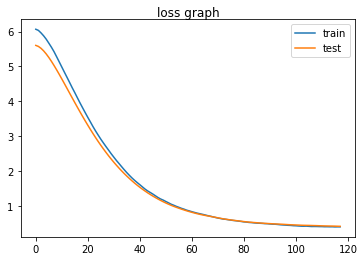

In [123]:
plt.plot(smooth_curve(original_hist_f.history['loss']), label='train')
plt.plot(smooth_curve(original_hist_f.history['val_loss']), label='test')
plt.title('loss graph', pad=-80)
plt.legend()

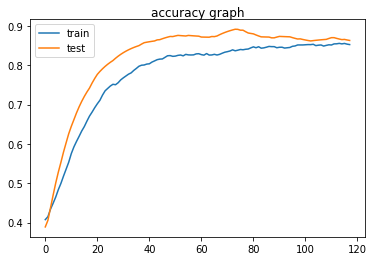

In [124]:
plt.plot(smooth_curve(original_hist_f.history['accuracy']), label='train')
plt.plot(smooth_curve(original_hist_f.history['val_accuracy']), label='test')
plt.title('accuracy graph', pad=-80)
plt.legend()

sur les deux graphes, on peut remarquer qu'il n'y a pas d'over fitting car le training n'a pas de meilleur résultat en gros écart avec le test

# Prédiction finale

val_loss=0.5858
val_accuracy=0.9074
(val_loss=0.4041 à l'époque 117)